In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sbj='005'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S005/S005R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
onset = []
duration = [4.1*3]*14
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [5]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [6]:
Data.rename_channels(ch_map)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~129 kB, data not loaded>

In [7]:
Data.set_montage(montage)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [8]:
#include ={'Fp1','Fpz', 'Fp2','FC1','FCz','FC2','C1','Cz','C2','CP1','CPz','CP2'}
include ={'Fp1', 'Fp2','AF3','AF4','AF7','AF8',
          'FC1','FC2','FC3','FC4','FC5','FC6',
          'C1','C2','C3','C4','C5','C6',
          'CP1','CP2','CP3','CP4','CP5','CP6'}

In [9]:
picks=mne.pick_channels(Data.ch_names, include, ordered=True)

In [8]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration))

[0, 1312, 2624, 3936, 5248, 6560, 7872, 9184, 10496, 11808, 13120, 14432, 15744, 17056]
[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3]


In [9]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [10]:
Data.set_annotations(my_ann)

<RawEDF | S005R03.edf, 64 x 19680 (123.0 s), ~178 kB, data not loaded>

In [12]:
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=12, baseline=(None,None))
#epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=12, picks=picks, baseline=(None,None))

Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [13]:
epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [14]:
T1=epochs['T1'].get_data()
T2=epochs['T2'].get_data()

Loading data for 7 events and 1921 original time points ...
0 bad epochs dropped
Loading data for 7 events and 1921 original time points ...
0 bad epochs dropped


In [15]:
import networkx as nx

In [16]:
epochs.ch_names

['FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'Fp1',
 'Fpz',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'AF4',
 'AF8',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FT8',
 'T7',
 'T8',
 'T9',
 'T10',
 'TP7',
 'TP8',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'O1',
 'Oz',
 'O2',
 'Iz']

In [17]:
info = Data.info
fmin=4
fmax=8
how_many=10

In [ ]:

for i in range(3):
    if i==0:
        continue
        
    T=epochs['T'+str(i)]
    print(T)
    plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='plv', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)
    if i==1:
        plv_T1=plv
    if i==2:
        plv_T2=plv
    

<Epochs  |   7 events (good & bad), 0 - 12 sec, baseline [None, None], ~178 kB, data not loaded,
 'T1': 7>
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2016 connections
    using t=0.000s..12.000s for estimation (1921 points)
    frequencies: 4.0Hz..8.0Hz (10 points)
    connectivity scores will be averaged for each band
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLV
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4


In [20]:
len(plv)

24

In [21]:
G_T1=nx.Graph()
G=G_T1

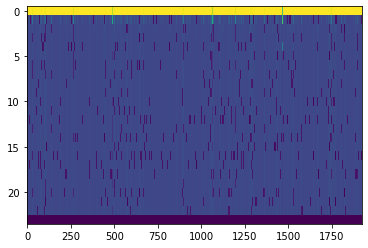

In [22]:
#t=5*160
centrality=[]
for t in range(len(plv_T1[1,1,0,:])):
    min_plv=0.2
    max_plv=0.95
    adj=plv_T1[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
    
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(H).values())
    
lst_T1=[]
for t in centrality:
    lst_T1.append(list(t))

plt.imshow(np.transpose(lst_T1), aspect='auto')

In [23]:
len(picks)

24

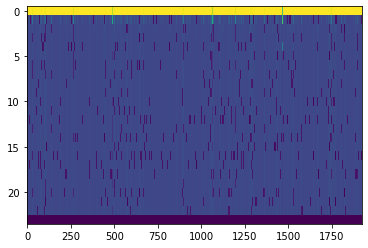

In [24]:
#t=5*160
centrality=[]
for t in range(len(plv_T2[1,1,0,:])):
    min_plv=0.2
    max_plv=0.95
    adj=plv_T2[:,:,0,t]
    G.clear()
    G.add_nodes_from(epochs.ch_names)
    pos=nx.circular_layout(G)
    for i in range(len(epochs.ch_names)-1):
        for j in range(i):
            if (adj[i,j]<=min_plv or adj[i,j]>=max_plv):
                continue
            w_edges= [(epochs.ch_names[i],epochs.ch_names[j],1-adj[i,j])]
            G.add_weighted_edges_from(w_edges)
    del H
    H=nx.minimum_spanning_tree(G, weight=1)
    centrality.append(nx.eigenvector_centrality(H).values())
    
lst_T2=[]
for t in centrality:
    lst_T2.append(list(t))
    
plt.imshow(np.transpose(lst_T1), aspect='auto')


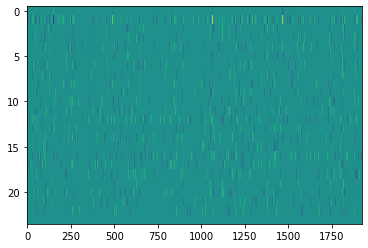

In [25]:
plt.imshow(np.transpose(np.array(lst_T1)-np.array(lst_T2)), aspect='auto')

#### computing minimum spanning tree ###Use graph H as minimum spanning tree
H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

In [26]:
(H.edges)


EdgeView([('FC6', 'FC5'), ('FC6', 'CP2'), ('FC6', 'C3'), ('FC6', 'Fp1'), ('FC6', 'C2'), ('FC6', 'CP3'), ('FC6', 'C1'), ('FC6', 'AF3'), ('FC6', 'FC3'), ('FC6', 'Fp2'), ('FC6', 'C6'), ('FC6', 'CP5'), ('FC6', 'FC1'), ('FC6', 'AF7'), ('FC6', 'FC4'), ('FC6', 'CP6'), ('FC6', 'AF8'), ('FC6', 'C5'), ('FC6', 'C4'), ('FC6', 'CP1'), ('FC6', 'FC2'), ('FC6', 'AF4')])

for values in G.nodes:
    evc.append(centrality[values])


H=nx.minimum_spanning_tree(G, weight=1)
print(sorted(H.edges(data=True)))
nx.draw(H,pos, with_labels=True)

pos=nx.spring_layout(G)
plt.figure(figsize=(100,100))
nx.draw_networkx_edges(G,pos,alpha=0.3,width=3, edge_color='m')
nodesize=10
nx.draw_networkx_nodes(G,pos,node_size=nodesize,node_color='w',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
nx.draw_networkx_labels(G,pos,fontsize=14)

In [30]:

layout = mne.find_layout(epochs.info, 'eeg')  # use full layout

tfr = mne.time_frequency.AverageTFR(epochs.info, lst_T1, times, freqs, len(lst_T1))
tfr.plot_topo(fig_facecolor='w', font_color='k', border='k')

AttributeError: 'list' object has no attribute 'ndim'